<a href="https://colab.research.google.com/github/hossein20s/Average_Blood_Pressure_estimation/blob/master/Ramtin_code_via_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import datetime as dt

class Timer():

	def __init__(self):
		self.start_dt = None

	def start(self):
		self.start_dt = dt.datetime.now()

	def stop(self):
		end_dt = dt.datetime.now()
		print('Time taken: %s' % (end_dt - self.start_dt))

In [38]:
!git clone https://github.com/hossein20s/notebook_snippets
!cd /content/notebook_snippets/; git pull
import sys
sys.path.append('notebook_snippets')
import importlib
importlib.reload(modelutil)

fatal: destination path 'notebook_snippets' already exists and is not an empty directory.
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/hossein20s/notebook_snippets
   5f1a595..e425e7c  master     -> origin/master
Updating 5f1a595..e425e7c
Fast-forward
 modelutil.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
save and load models from yaml and json files defined. Everything stored in folder  <built-in function dir>


<module 'modelutil' from 'notebook_snippets/modelutil.py'>

In [30]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/models" models
!ln -s "/gdrive/My Drive/data" data
!ln -s "/gdrive/My Drive/snapshot" snapshot

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
ln: failed to create symbolic link 'models/models': Function not implemented
ln: failed to create symbolic link 'data/data': Function not implemented


In [5]:
!pip install gcsfs

import pandas as pd

case_id = '01'
data = pd.read_csv('http://storage.googleapis.com/medicalblockchain_dev/data/UniversityQueenslandVitalSignals/case%s/uq_vsd_case%s_trenddata.csv'%(case_id, case_id),\
                               error_bad_lines=False, warn_bad_lines=False, index_col=False);
data = data[["RelativeTimeMilliseconds", "NBP (Mean)", "Minute Volume"]].dropna()
data = (data - data.mean())/(data.max() - data.min())


DATA_FILE = 'case1_trends_3column.csv'

data.to_csv(DATA_FILE)


     |████████████████████████████████| 61kB 3.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/9f/0f/b9/5bc5222756d121ccace51ab3084a1c733380908a4e2f939038
Successfully built gcsfs


In [13]:
import datautil
datautil import data_reader

array_size = 80
batch_size = 64
max_epoch = 2
n_time_steps = 80

reader = data_reader(DATA_FILE, l=array_size, batchsize=batch_size)
data_train, data_label = reader.get_shuff_train_label()


   Unnamed: 0  RelativeTimeMilliseconds  NBP (Mean)  Minute Volume
0           8                 -0.502928    0.668077      -0.426493
1           9                 -0.502789    0.668077      -0.426493
2          10                 -0.502651    0.668077      -0.426493


/content/notebook_snippets/datautil.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  df = df[["NBP (Mean)", "Minute Volume"]].dropna().as_matrix()


In [26]:
import modelutil

model = modelutil.load_model_yaml('models', '2lstm64')
model.compile(loss='mse', 
                       optimizer='adam',
                      metrics=['acc','mse'])
model.summary()

load model from file models/model.2lstm64.yaml
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 80, 64)            16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [0]:
from modelutil import PrintDot

callbacks = [
      PrintDot()
]
history = model.fit(
  data_train,
  data_label,
  epochs=max_epoch,
  batch_size=batch_size,
  validation_split = 0.35,
  verbose=0,
  callbacks=callbacks
)



.

In [0]:

modelutil.save_model_yaml('models', model, 'ramtin2lstam64')

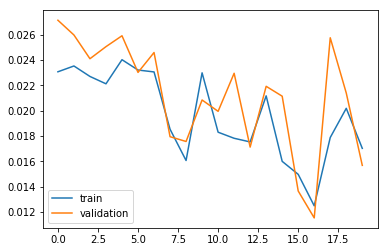

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(max_epoch), history.history['loss'], label='train')
plt.plot(np.arange(max_epoch), history.history['val_loss'], label='validation')
plt.legend()

# Older Stuff

In [0]:

import json
!wget "bit.ly/ramtinconfig" -O config.ramtin.json
CONFIG_JSON_FILE = 'config.ramtin.json'
import os
configs = json.load(open(CONFIG_JSON_FILE, 'r'))

'''
data = DataLoader(
	os.path.join('data', configs['data']['filename']),
	configs['data']['train_test_split'],
	configs['data']['columns']
)
'''
array_size = configs['training']['feature_size']
reader = data_reader(
	os.path.join( configs['data']['filename']),
	l=array_size,
	batchsize=configs['training']['batch_size']
)


In [0]:
s = [10,20]
for i in s:
  print(i)


10
20


In [0]:
dataframe = reader.df
dataframe.shape

In [0]:
!wget bit.ly/plot_lib -O plot_lib.ipynb
facets_display(reader.df)


--2019-06-12 03:03:13--  http://bit.ly/plot_lib
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/hossein20s/Average_Blood_Pressure_estimation/master/plot_lib.ipynb [following]
--2019-06-12 03:03:13--  https://raw.githubusercontent.com/hossein20s/Average_Blood_Pressure_estimation/master/plot_lib.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15271 (15K) [text/plain]
Saving to: ‘plot_lib.ipynb’

plot_lib.ipynb      100%[===================>]  14.91K  --.-KB/s    in 0.01s   

2019-06-12 03:03:13 (1.20 MB/s) - ‘plot_lib.ipynb’ saved [15271/15271]



In [0]:
import os
import math
import numpy as np
import datetime as dt
from numpy import newaxis
from keras.layers import Dense, Activation, Dropout, LSTM
from keras import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import TimeDistributed
from keras.layers import RepeatVector, Conv1D, MaxPool1D, Flatten

class TheModel():
  """A class for an building and inferencing an lstm model"""

  def __init__(self):
    self.model = Sequential()

  def load_model(self, filepath):
    print('[Model] Loading model from file %s' % filepath)
    self.model = load_model(filepath)

  def build_model(self, configs):
    timer = Timer()
    timer.start()
    timer.start()
    
    input_shape = None
    has_input_shape = False
    is_first_layer = True



    for layer in configs['model']['layers']:
      neurons = layer['neurons'] if 'neurons' in layer else None
      rate = layer['rate'] if 'rate' in layer else None
      activation = layer['activation'] if 'activation' in layer else None
      return_seq = layer['return_seq'] if 'return_seq' in layer else None
      input_timesteps = layer['input_timesteps'] if 'input_timesteps' in layer else None
      input_dim = layer['input_dim'] if 'input_dim' in layer else None
      kernel_size = layer['kernel_size'] if 'kernel_size' in layer else None
      filters = layer['filters'] if 'filters' in layer else None
      strides = layer['strides'] if 'strides' in layer else 1
      print(kernel_size)
      if 'input_shape' in layer:
        input_shape = layer['input_shape']
        has_input_shape = true

      if layer['type'] == 'dense':
        if(is_first_layer):
          self.model.add(Dense(neurons, activation=activation, input_shape=input_shape))
          is_first_layer = False
        else:
          self.model.add(Dense(neurons, activation=activation))
      if layer['type'] == 'lstm' or layer['type'] == 'conv1D':
        input_shape=(input_timesteps, input_dim)
        has_input_shape = True
        if(layer['type'] == 'lstm'):
          if is_first_layer:
            self.model.add(LSTM(neurons, input_shape=input_shape, return_sequences=return_seq))
            is_first_layer = False
          else:
            self.model.add(LSTM(neurons, return_sequences=return_seq))
        if(layer['type'] == 'conv1D'):
          if is_first_layer:
            self.model.add(Conv1D(filters, kernel_size, strides=strides, activation='relu', input_shape=input_shape))
            is_first_layer = False
          else:
            self.model.add(Conv1D(filters, kernel_size, strides=strides, activation='relu'))
      if layer['type'] == 'dropout':
          self.model.add(Dropout(rate))
      if layer['type'] == 'flatten':
          self.model.add(Flatten())
      if layer['type'] == 'maxpool1D':
          self.model.add(MaxPool1D(rate))
      if layer['type'] == 'repeat_vector':
        self.model.add(RepeatVector(input_timesteps))
      if layer['type'] == 'time_distributed_dense':
        self.model.add(TimeDistributed(Dense(neurons, activation=activation)))
      if layer['type'] == 'attention_decoder':
        self.model.add(AttentionDecoder(neurons, input_dim))
      if layer['type'] == 'attention':
        self.model.add(Attention())

    print(configs['model']['metrics'])
    self.model.compile(loss='mse', 
                       optimizer=configs['model']['optimizer'],
                      metrics=configs['model']['metrics'])
    print('[Model] Model Compiled')
    print('input_shape: ',input_shape)
    if has_input_shape:
      self.model.summary()
    timer.stop()

  def fit(self, x, y, epochs, batch_size, validation_split, save_dir):
    timer = Timer()
    timer.start()
    print('[Model] Training Started')
    print('[Model] %s epochs, %s batch size' % (epochs, batch_size))

    save_fname = os.path.join(save_dir, '%s-e%s.h5' % (dt.datetime.now().strftime('%d%m%Y-%H%M%S'), str(epochs)))

    callbacks = [
        PrintDot()
    #            EarlyStopping(monitor='val_loss', patience=2),
    #            ModelCheckpoint(filepath=save_fname, monitor='val_loss', save_best_only=True)
    ]
    history = self.model.fit(
      x,
      y,
      epochs=epochs,
      batch_size=batch_size,
      validation_split = validation_split, 
      verbose=0,
      callbacks=callbacks
    )
    self.model.save(save_fname)

    print('[Model] Training Completed. Model saved as %s' % save_fname)
    timer.stop()
    return history

  def fit_generator(self, data_gen, epochs, batch_size, steps_per_epoch, save_dir):
    timer = Timer()
    timer.start()
    print('[Model] Training Started')
    print('[Model] %s epochs, %s batch size, %s batches per epoch' % (epochs, batch_size, steps_per_epoch))

    save_fname = os.path.join(save_dir, '%s-e%s.h5' % (dt.datetime.now().strftime('%d%m%Y-%H%M%S'), str(epochs)))
    callbacks = [
      ModelCheckpoint(filepath=save_fname, monitor='loss', save_best_only=True)
    ]
    self.model.fit_generator(
      data_gen,
      steps_per_epoch=steps_per_epoch,
      epochs=epochs,
      callbacks=callbacks,
      workers=1
    )

    print('[Model] Training Completed. Model saved as %s' % save_fname)
    timer.stop()

  def predict_point_by_point(self, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    print('[Model] Predicting Point-by-Point...')
    predicted = self.model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

  def predict_sequences_multiple(self, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    print('[Model] Predicting Sequences Multiple...')
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
      curr_frame = data[i*prediction_len]
      predicted = []
      for j in range(prediction_len):
        predicted.append(self.model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
      prediction_seqs.append(predicted)
    return prediction_seqs

  def predict_sequence_full(self, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    print('[Model] Predicting Sequences Full...')
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
      predicted.append(self.model.predict(curr_frame[newaxis,:,:])[0,0])
      curr_frame = curr_frame[1:]
      curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
    return predicted



In [0]:

import json

theModel = TheModel()
print(configs)
theModel.build_model(configs)

max_epoch = configs['training']['epochs']

epoch = reader.get_epoch()

x = np.expand_dims(reader.shuf_data, axis=-1)
y = reader.shuf_label
history = theModel.fit(
  x,
  y,
  epochs = max_epoch,
  batch_size = configs['training']['batch_size'],
  validation_split = configs['training']['validation_split'],
  save_dir = configs['model']['save_dir']
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


{'data': {'columns': ['RelativeTimeMilliseconds, NBP (Mean), Minute Volume'], 'filename': 'case1_trends_3column.csv', 'n_features': 1, 'normalise': True, 'sequence_length': 64, 'train_test_split': 0.85}, 'model': {'layers': [{'filters': 10, 'input_dim': 1, 'input_timesteps': 80, 'kernel_size': 20, 'strides': 5, 'type': 'conv1D'}, {'filters': 20, 'kernel_size': 5, 'type': 'conv1D'}, {'filters': 40, 'kernel_size': 5, 'type': 'conv1D'}, {'type': 'flatten'}, {'activation': 'linear', 'neurons': 1, 'type': 'dense'}], 'loss': 'mse', 'metrics': ['mse', 'acc'], 'optimizer': 'adam', 'save_dir': '/tmp'}, 'training': {'batch_size': 64, 'epochs': 500, 'feature_size': 80, 'validation_split': 0.35}}
20
Instructions for updating:
Colocations handled automatically by placer.
5
5
None
None
['mse', 'acc']
[Model] Model Compiled
input_shape:  (None, None)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)   

,val_loss,val_mean_squared_error,val_acc,loss,mean_squared_error,acc,epoch
495,0.001387,0.001387,0.0,0.000697,0.000697,0.0,495
496,0.001497,0.001497,0.0,0.000706,0.000706,0.0,496
497,0.001429,0.001429,0.0,0.000731,0.000731,0.0,497
498,0.001393,0.001393,0.0,0.000836,0.000836,0.0,498
499,0.001355,0.001355,0.0,0.000748,0.000748,0.0,499


In [0]:
import json

theModel = TheModel()
print(configs)
theModel.build_model(configs)


{'data': {'columns': ['RelativeTimeMilliseconds, NBP (Mean), Minute Volume'], 'filename': 'case1_trends_3column.csv', 'n_features': 1, 'normalise': True, 'sequence_length': 64, 'train_test_split': 0.85}, 'model': {'layers': [{'filters': 10, 'input_dim': 1, 'input_timesteps': 80, 'kernel_size': 20, 'strides': 5, 'type': 'conv1D'}, {'filters': 20, 'kernel_size': 5, 'type': 'conv1D'}, {'filters': 40, 'kernel_size': 5, 'type': 'conv1D'}, {'type': 'flatten'}, {'activation': 'linear', 'neurons': 1, 'type': 'dense'}], 'loss': 'mse', 'metrics': ['mse', 'acc'], 'optimizer': 'adam', 'save_dir': '/tmp'}, 'training': {'batch_size': 64, 'epochs': 500, 'feature_size': 80, 'validation_split': 0.35}}
20
5
5
None
None
['mse', 'acc']
[Model] Model Compiled
input_shape:  (None, None)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 13, 10)            210       
__________________________

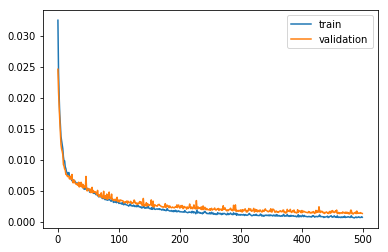

In [0]:
import matplotlib.pyplot as plt

plt.plot(np.arange(max_epoch), history.history['loss'], label='train')
plt.plot(np.arange(max_epoch), history.history['val_loss'], label='validation')
plt.legend()


In [0]:
configs

{'data': {'columns': ['RelativeTimeMilliseconds, NBP (Mean), Minute Volume'],
  'filename': 'case1_trends_3column.csv',
  'n_features': 1,
  'normalise': True,
  'sequence_length': 64,
  'train_test_split': 0.85},
 'model': {'layers': [{'filters': 10,
    'input_dim': 1,
    'input_timesteps': 80,
    'kernel_size': 20,
    'strides': 5,
    'type': 'conv1D'},
   {'filters': 20, 'kernel_size': 5, 'type': 'conv1D'},
   {'filters': 40, 'kernel_size': 5, 'type': 'conv1D'},
   {'type': 'flatten'},
   {'activation': 'linear', 'neurons': 1, 'type': 'dense'}],
  'loss': 'mse',
  'metrics': ['mse', 'acc'],
  'optimizer': 'adam',
  'save_dir': '/tmp'},
 'training': {'batch_size': 64,
  'epochs': 500,
  'feature_size': 80,
  'validation_split': 0.35}}

In [0]:
np.max(x)

0.3860074284666177

In [0]:
theModel.model.loss

'mean_squared_error'

In [0]:
for layer in configs['model']['layers']:
  print(layer)

{'filters': 10, 'input_dim': 1, 'input_timesteps': 80, 'kernel_size': 20, 'strides': 5, 'type': 'conv1D'}
{'filters': 20, 'kernel_size': 5, 'type': 'conv1D'}
{'filters': 40, 'kernel_size': 5, 'type': 'conv1D'}
{'type': 'flatten'}
{'activation': 'linear', 'neurons': 1, 'type': 'dense'}


In [0]:
from keras.models import model_from_json

model = theModel.model 

# serialize model to JSON
model_json = model.to_json()
with open("model.ramtin.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.ramtin.h5")
print("Saved model to disk")



Saved model to disk


In [0]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/data" "data"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!cp model.ramtin.* data/

In [0]:
!git clone https://github.com/hossein20s/notebook_snippets 
!cd notebook_snippets; git pull

fatal: destination path 'notebook_snippets' already exists and is not an empty directory.
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/hossein20s/notebook_snippets
   bd6fb2f..77aabde  master     -> origin/master
Updating bd6fb2f..77aabde
Fast-forward
 modelutil.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [0]:
from notebook_snippets import modelutil


Using TensorFlow backend.


save and load models from yaml and json files defined. Everything stored in folder  <built-in function dir>
